<a href="https://colab.research.google.com/github/ThayMosqueiro22/faculdadeAnhanguera/blob/main/venda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


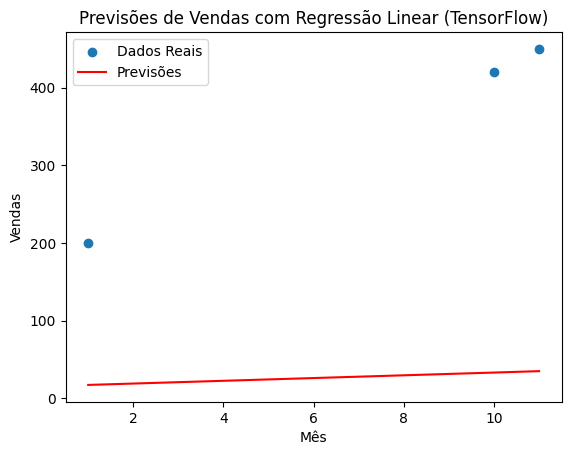

Erro Médio Quadrático (MSE): 118568.77
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Previsão de Vendas para o Próximo Mês: 38.35


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error # Import mean_squared_error
import tensorflow as tf

# Crie dados fictícios de vendas ao longo do tempo
np.random.seed(42)
meses = np.arange(1, 13)
vendas = np.array([200, 220, 250, 280, 300, 320, 350, 380, 400, 420, 450, 480])

# Crie um DataFrame
dados = pd.DataFrame({'Mes': meses, 'Vendas': vendas})

# Visualize os dados
plt.scatter(dados['Mes'], dados['Vendas'])
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Dados de Vendas ao Longo do Tempo')
plt.show()

# Divida os dados em conjunto de treinamento e teste
X = dados[['Mes']]
y = dados['Vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados de treinamento e teste
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crie e treine o modelo de regressão linear usando TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Camada de entrada
    tf.keras.layers.Dense(units=8, activation='relu'),  # Camada escondida com ativação ReLU
    tf.keras.layers.Dense(units=1)  # Camada de saída
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Treine o modelo por mais épocas usando dados escalados
model.fit(X_train_scaled, y_train, epochs=500, verbose=0)

# Faça previsões no conjunto de teste usando dados escalados
predictions_scaled = model.predict(X_test_scaled)

# Desfaça a normalização para avaliar o desempenho
predictions_inverse = scaler.inverse_transform(predictions_scaled) # Use inverse_transform
y_test_inverse = y_test.values.reshape(-1, 1) # Reshape y_test for inverse_transform
y_test_inverse = scaler.inverse_transform(y_test_inverse) # Apply inverse scaling to y_test as well


# Visualize as previsões em relação aos dados reais
plt.scatter(X_test, y_test, label='Dados Reais') # Use original X_test and y_test for plotting
plt.plot(X_test, predictions_inverse, color='red', label='Previsões')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Previsões de Vendas com Regressão Linear (TensorFlow)')
plt.legend()
plt.show()

# Avalie o desempenho do modelo
erro_mse = mean_squared_error(y_test, predictions_inverse) # Use original y_test for MSE calculation
print(f'Erro Médio Quadrático (MSE): {erro_mse:.2f}')

# Faça uma previsão para o próximo mês
proximo_mes = np.array([[13]])
proximo_mes_scaled = scaler.transform(proximo_mes)
previsao_proximo_mes_scaled = model.predict(proximo_mes_scaled)
previsao_proximo_mes = scaler.inverse_transform(previsao_proximo_mes_scaled)[0, 0]
print(f'Previsão de Vendas para o Próximo Mês: {previsao_proximo_mes:.2f}')